### GUS4073
### Olivia Given Castello
### 12/12/2021
### Final Project: Static Map
#### Data: Temple Library chats received Jan - Jun 2021

1. Use python to create a static map
2. Provide the code (Jupyter Notebook) and your picture of it

In [2]:
# Import geopandas to read the spatial data
import geopandas as gpd

# Read in chat data by US state 
us_chats_shp = r'data/ContinentalUS_chats.shp'
us_chats_gdf = gpd.read_file(us_chats_shp)

state_bound = gpd.read_file('data/tl_2021_us_state/tl_2021_us_state.shp')

us_chats_gdf.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,NUMPOINTS,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266298634,489204185,+38.6472854,-080.6183274,0.0,"POLYGON ((-80.85847 37.42831, -80.85856 37.428..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138961722096,45972570361,+28.3989775,-082.5143005,19.0,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778561906,6216493488,+40.1028754,-089.1526108,5.0,"POLYGON ((-89.17208 37.06831, -89.17296 37.067..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232627084,18949394733,+46.3159573,-094.1996043,6.0,"POLYGON ((-92.74568 45.29604, -92.74629 45.295..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151992308,6979074857,+38.9466584,-076.6744939,9.0,"POLYGON ((-75.76659 39.37756, -75.76630 39.373..."


In [3]:
# Check the projection of the dataframes
print('The US chat data projection is:', us_chats_gdf.crs)
print('The projection of the state boundary is:', state_bound.crs)

The US chat data projection is: epsg:4326
The projection of the state boundary is: epsg:4269


In [4]:
# Change the projection to Albers Area Equal Conic
# USGS recommends this projection
# "for maps showing the conterminous United States (48 states) or large areas of the United States"
# Source: U.S. Geological Survey (1993). Map projections. [USGS Unnumbered Series] https://doi.org/10.3133/70047422

us_chats_gdf = us_chats_gdf.to_crs(epsg=5070) 
state_bound_us = state_bound.to_crs(epsg=5070)

print('The US chat data projection is:', us_chats_gdf.crs)
print('The projection of the state boundary is:', state_bound_us.crs)

The US chat data projection is: epsg:5070
The projection of the state boundary is: epsg:5070


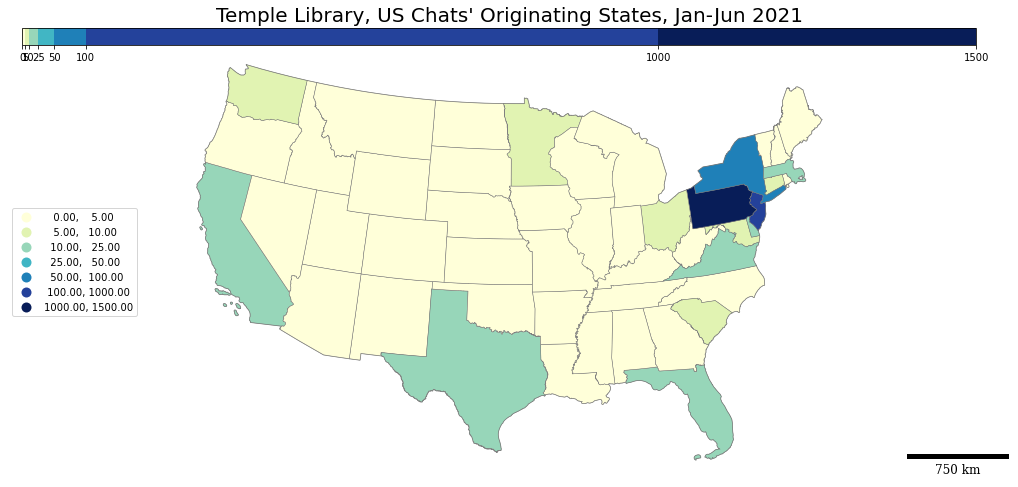

In [7]:
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import mapclassify as mc
from matplotlib_scalebar.scalebar import ScaleBar


# Create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(18, 8))

# Set the number of categories to map
n_class = 7

# Set the color scheme
color_scheme = 'YlGnBu'
cmap = plt.cm.get_cmap(color_scheme, n_class)

# Set the background
state_bound_us.plot(ax=ax, alpha=0.5, color='grey', edgecolor='k')

# Indicate the field we are plotting and custom breaks
field = 'NUMPOINTS'
#bins = [10, 25, 100, 200, 1500]
bins = [5, 10, 25, 50, 100, 1000, 1500]

# Plot the choropleth map
us_chats_gdf.plot(column=field, 
                  cmap=color_scheme, 
                  edgecolor='0.5', 
                  ax = ax,
                  linewidth=0.5,
                  k=n_class, 
                  
# This data is highly skewed because most chat interactions come from within the state of PA
# Using custom breaks gives the clearest visualization
#                  scheme='equal_interval') 
#                  scheme='NaturalBreaks', 
#                  scheme='fisher_jenks') 
#                  scheme='quantiles') 
#                  scheme='MaximumBreaks') 
                  scheme='User_Defined', 
                  classification_kwds={'bins': bins}, 
                  
# Leave in this legend because the lowest 2 bin labels are crowded on the color bar
                  legend=True,
                  legend_kwds={'loc': 'center left'},
)      

# Match the scheme of the geopandas plot
#nb = mc.EqualInterval(us_chats_gdf[field].dropna(), k=n_class)
#nb = mc.NaturalBreaks(us_chats_gdf[field].dropna(), k=n_class)
#nb = mc.FisherJenks(us_chats_gdf[field].dropna(), k=n_class)
#nb = mc.Quantiles(us_chats_gdf[field].dropna(), k=n_class)
#nb = mc.MaximumBreaks(us_chats_gdf[field].dropna(), k=n_class)
nb = mc.UserDefined(us_chats_gdf[field].dropna(), bins=bins)

vals = list(nb.bins)
vals.insert(0, us_chats_gdf[field].min())

# Set the location of the colorbar
axins = ax.inset_axes([0.015, 1., 0.95, 0.04])

# Create the colorbar
norm = mpl.colors.BoundaryNorm(vals, cmap.N)
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
                                spacing='proportional', 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

ax.set_title('Temple Library, US Chats\' Originating States, Jan-Jun 2021', fontdict={'fontsize': '20', 'fontweight' : '4'})

# Add a scale bar
scale = ScaleBar(
    dx=1, 
    length_fraction=.125,
    location='lower right',
    font_properties={'family':'serif', 'size': 'large'},
    box_alpha=1
)
ax.add_artist(scale)

ax.set_axis_off()
plt.axis('equal')

# Save to an image file
plt.savefig('GUS4073-Castello-FinalProjectStaticMap.png',dpi=200)
plt.show()